In [43]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import os

# Obtener la ruta actual del directorio de trabajo
current_dir = os.getcwd()

# Especificar el prefijo y sufijo del nombre de archivo
prefix = '1wb'
suffix = '.dat'

# Crear una lista vacía para almacenar los DataFrames
dfn = []

# Crear un loop para leer cada archivo y agregarlo a la lista de DataFrames
for i in range(1, 101):
    # Crear el nombre del archivo utilizando el prefijo y sufijo
    filename = prefix + str(i).zfill(3) + suffix
    
    # Leer el archivo y agregarlo a la lista de DataFrames
    df = pd.read_csv(os.path.join(current_dir, 'Partículas con 50% y 50%', filename), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])
    dfn.append(df)

In [44]:
len(dfn)

100

In [45]:
#Se toma el último dato de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfn[i].X.iloc[9999]
    y = dfn[i].Y.iloc[9999]
    datx.append(x)
    daty.append(y)
dfLast = pd.DataFrame({"X" : datx, "Y" : daty})
dfLast.index = np.arange(1, 101)
dfLast

,X,Y
1,-83.0,-95.0
2,-107.0,69.0
3,69.0,69.0
4,-123.0,-25.0
5,1.0,-1.0
...,...,...
96,-61.0,31.0
97,-79.0,81.0
98,-157.0,83.0
99,115.0,61.0


In [46]:
#Descripción estadística de datos.
dfLast.describe()

,X,Y
count,100.00000,100.000000
mean,-0.22000,10.200000
std,107.60943,93.259278
min,-305.00000,-253.000000
25%,-72.00000,-37.500000
50%,5.00000,16.000000
75%,76.00000,73.000000
max,227.00000,231.000000


<AxesSubplot:>

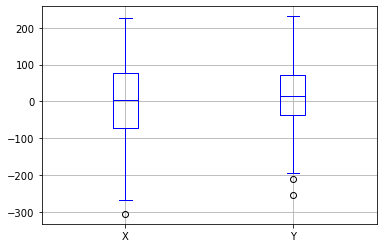

In [47]:
#Boxplot para los últimos datos.
dfLast.plot.box(grid=True,color='b')

In [48]:
#Se verifican los tipos de datos (que sean float64).
dfLast.dtypes

X    float64
Y    float64
dtype: object

In [49]:
#Promedio en "X" y "Y".
mediax = dfLast["X"].mean()
mediay = dfLast["Y"].mean()

#Desviación Estándar en "X" y "Y".
sdx = dfLast["X"].std()
sdy = dfLast["Y"].std()

#Arreglos para medias y desviaciones
MediasObs = [mediax, mediay]
DesvObs = [sdx, sdy]

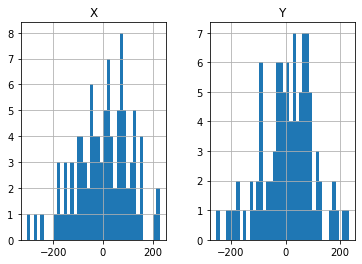

In [50]:
#Histograma con "bins" columnas.
hist = dfLast.hist(bins=40)

In [51]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfLast
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra no sigue una distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.988, p=0.077
La muestra parece seguir una distribución Gaussiana (no se rechaza H0)


In [52]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfLast["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)
print("Media observada =", mediay)
print("Desviación observada =", sdy)

Media ajustada a la normal = 10.2
Desviación ajustada a la normal = 92.79180998342473
Media observada = 10.2
Desviación observada = 93.25927797968913


In [53]:
#Se hace un ajuste para aproximar a una Normal para las "X".
MediasX, DesvX = ss.norm.fit(dfLast["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)
print("Media observada =", mediax)
print("Desviación observada =", sdx)

Media ajustada a la normal = -0.22
Desviación ajustada a la normal = 107.07003128793788
Media observada = -0.22
Desviación observada = 107.60943032536456


---------------------------------------------------------------------------------

Se analizará el paso 100 de las 100 trayectorias de partículas.

In [54]:
#Se toma el dato 100 de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfn[i].X.iloc[100]
    y = dfn[i].Y.iloc[100]
    datx.append(x)
    daty.append(y)
dfCien = pd.DataFrame({"X" : datx, "Y" : daty})
dfCien.index = np.arange(1, 101)
dfCien

,X,Y
1,-8.0,-4.0
2,-6.0,2.0
3,-14.0,28.0
4,8.0,0.0
5,14.0,18.0
...,...,...
96,-8.0,-12.0
97,-4.0,-6.0
98,4.0,6.0
99,-10.0,18.0


In [56]:
#Descripción estadística de datos.
dfCien.describe()

,X,Y
count,100.000000,100.00000
mean,-1.220000,0.60000
std,9.920472,10.34945
min,-28.000000,-22.00000
25%,-8.000000,-6.00000
50%,-2.000000,0.00000
75%,4.000000,6.50000
max,20.000000,28.00000


<AxesSubplot:>

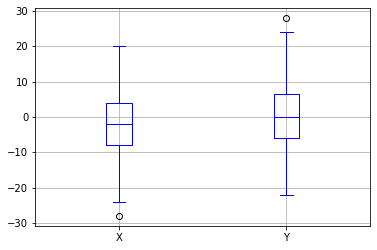

In [57]:
#Boxplot para los 100° datos.
dfCien.plot.box(grid=True, color='b')

In [58]:
#Se verifican los tipos de datos (que sean float64).
dfCien.dtypes

X    float64
Y    float64
dtype: object

In [59]:
#Promedio en "X" y "Y".
mediax = dfCien["X"].mean()
mediay = dfCien["Y"].mean()

#Desviación Estándar en "X" y "Y".
sdx = dfCien["X"].std()
sdy = dfCien["Y"].std()

#Arreglos para medias y desviaciones
MediasObs = [mediax, mediay]
DesvObs = [sdx, sdy]


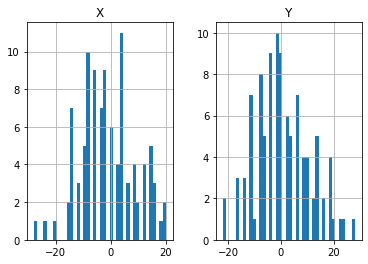

In [60]:
#Histograma con "bins" columnas.
hist = dfCien.hist(bins=40)

In [61]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfCien
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.989, p=0.108
La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)


In [62]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfCien["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)
print("Media observada =", mediay)
print("Desviación observada =", sdy)

Media ajustada a la normal = 0.6
Desviación ajustada a la normal = 10.2975725294848
Media observada = 0.6
Desviación observada = 10.349449797506683


In [63]:
#Se hace un ajuste para aproximar a una Normal para las "X".
MediasX, DesvX = ss.norm.fit(dfCien["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)
print("Media observada =", mediax)
print("Desviación observada =", sdx)

Media ajustada a la normal = -1.22
Desviación ajustada a la normal = 9.8707446527605
Media observada = -1.22
Desviación observada = 9.920471640791966


-------------------------------------------------

Mostraremos algunos ejemplos

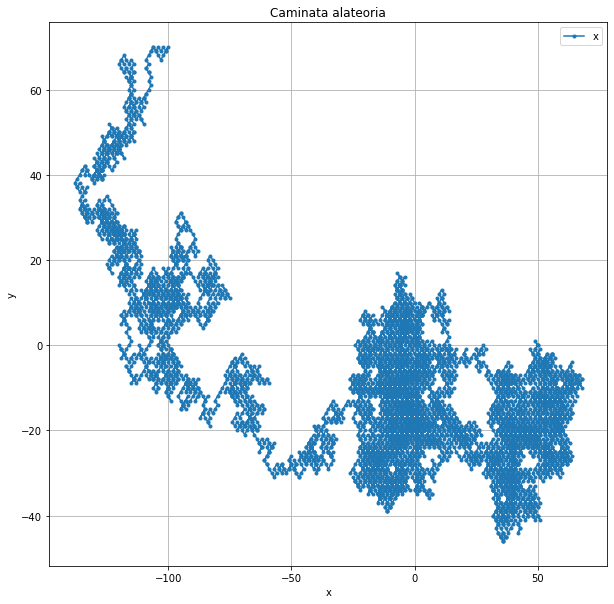

In [69]:
#Graficamos la trayectoria de la partícula 1wb002
#Leyendo para ese archivo en especifico
df2 = pd.read_csv(os.path.join(current_dir, 'Partículas con 50% y 50%', '1wb002.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(df2["X"], df2["Y"],label='x', marker=".")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

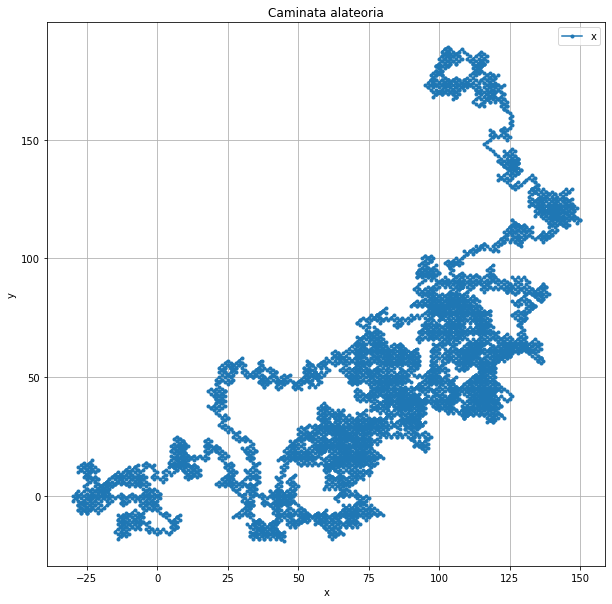

In [71]:
#Graficamos la trayectoria de la partícula 1wb032
#Leyendo para ese archivo en especifico
df32 = pd.read_csv(os.path.join(current_dir, 'Partículas con 50% y 50%', '1wb032.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(df32["X"], df32["Y"],label='x', marker=".")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

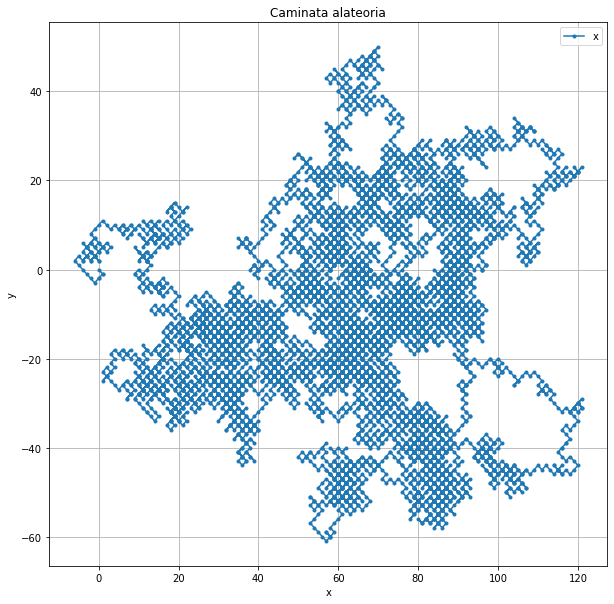

In [72]:
#Graficamos la trayectoria de la partícula 1wb072
#Leyendo para ese archivo en especifico
df72 = pd.read_csv(os.path.join(current_dir, 'Partículas con 50% y 50%', '1wb072.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(df72["X"], df72["Y"],label='x', marker=".")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

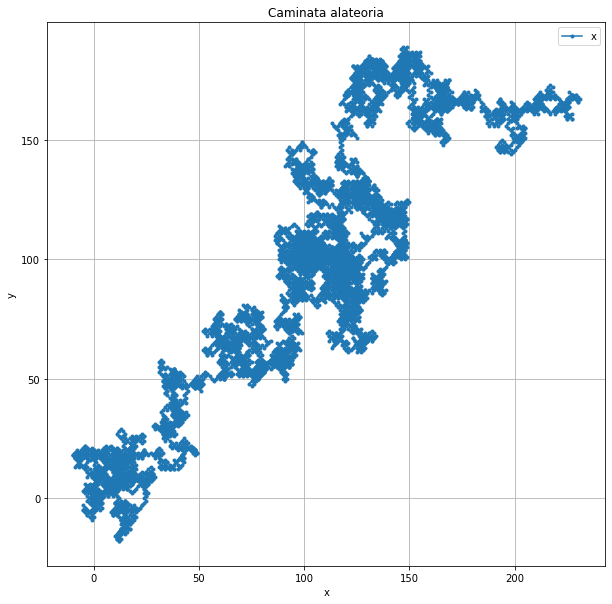

In [73]:
#Graficamos la trayectoria de la partícula 1wb078
#Leyendo para ese archivo en especifico
df78 = pd.read_csv(os.path.join(current_dir, 'Partículas con 50% y 50%', '1wb078.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(df78["X"], df78["Y"],label='x', marker=".")
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

Ahora se analizará la manera de decidir la probabilidad de tomar un paso a la derecha o izquierda (en las posiciones en X), o un paso hacia arriba o abajo (en las posiciones en Y).
Los archivos utilizados para ello contienen dos columnas, cada una con una secuencia de números aleatorios con distribución uniforme.
En base a estos números aleatorios con distribución uniforme, se decidieron las probabilidades (0.5 a cada lado, tanto en X y Y). Debido a que la distribución es uniforme, cada vez que se decidió un paso de la partícula, se llamó a un número aleatorio NAX para su movimiento en X, y otro número aleatorio NAY para su movimiento en Y. 

En X se toman valores entre 0 y 1.
   - Si NAX < 0.5, se desplaza a la derecha. 
   - Si NAX > 0.5, se desplaza a la izquierda.
   
En Y se toman valores entre 0 y 1.
   - Si NAY < 0.5, se desplaza hacia arriba.
   - Si NAY > 0.5, se desplaza hacia abbajo.

Esto debe ser consistente con el Teorema del Límite Central, ya que la probabilidad de que la partícula, después de una gran cantidad de pasos, esté a determinados pasos de su origen, debe corresponder a una distribución Gaussiana (Observado en los histogramas anteriores).


In [89]:
#Leemos los archivos de 100,000 números aleatorios. 
#Se usa Skiprows de -1 para dejar pasar un espacio y nombrar a las columnas "NAX" (Número Aleatorio en X) y 
#"NAY" (Número Aleatorio en Y).
#Se lee el archivo con 100,000 parejas de datos aleatorios.
file_path_NA100k = os.path.join(current_dir, 'Números Aleatorios', 'nale100000.dat')
dfRand100000 = pd.DataFrame(pd.read_csv(file_path_NA100k, skiprows=-1, sep='\s+', header=None, names=["NAX", "NAY"]))


dfRand100000.index = np.arange(1, 100000)
dfRand100000.head()

,NAX,NAY
1,0.000646,0.039731
2,0.745907,0.092802
3,0.138931,0.465426
4,0.884016,0.146203
5,0.656223,0.947122


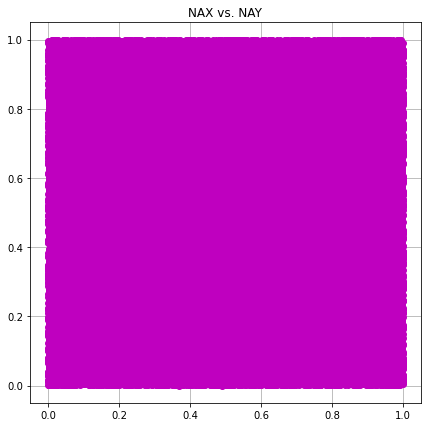

In [90]:
#Como se trata de una distribución uniforme, un gráfica del DataFrame debería tener puntos distribuídos
#uniformemente enel rango de 0 a 1 para X y de 0.5 a 1 para Y.
#Graficamos las parejas de datos aleatorios.
plt.figure(figsize=(7, 7))
#Marcamos la trayectoria con puntos.
plt.plot(dfRand100000["NAX"], dfRand100000["NAY"], 'mo')
plt.grid(True)
#plt.legend()
plt.title("NAX vs. NAY")
plt.show()

Se puede observar que aproximadamente existen la misma cantidad de puntos en cada uno, por lo que sería correcto inferir que se tiene la misma probabilidad de ir a un lado u otro, o arriba o abajo , es decr, que el movimiento en X o en Y no está favorecido en alguna dirección.

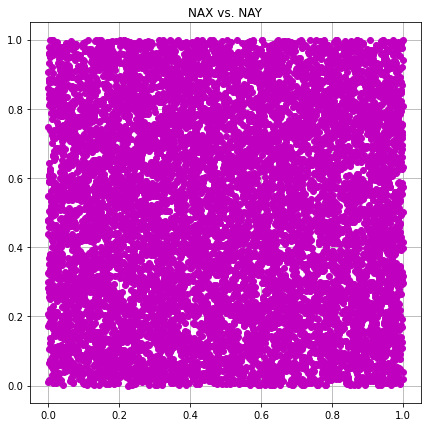

In [91]:
#Leemos los archivos de 10,000 números aleatorios. 
#Se usa Skiprows de -1 para dejar pasar un espacio y nombrar a las columnas "NAX" (Número Aleatorio en X) y 
#"NAY" (Número Aleatorio en Y).
#Se lee el archivo con 1000 parejas de datos aleatorios.
file_path_NA10k = os.path.join(current_dir, 'Números Aleatorios', 'nale10000.dat')
dfRand10000 = pd.DataFrame(pd.read_csv(file_path_NA10k, skiprows=-1, sep='\s+', header=None, names=["NAX", "NAY"]))

dfRand1000.index = np.arange(1, 1000)
#Graficamos las parejas de datos aleatorios.
plt.figure(figsize=(7, 7))
#Marcamos la trayectoria con puntos.
plt.plot(dfRand10000["NAX"], dfRand10000["NAY"], 'mo')
plt.grid(True)
#plt.legend()
plt.title("NAX vs. NAY")
plt.show()

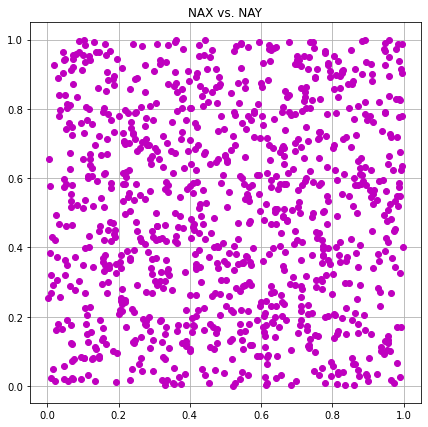

In [92]:
#Leemos los archivos de 1000 números aleatorios. 
#Se usa Skiprows de -1 para dejar pasar un espacio y nombrar a las columnas "NAX" (Número Aleatorio en X) y 
#"NAY" (Número Aleatorio en Y).
#Se lee el archivo con 1000 parejas de datos aleatorios.
file_path_NA1k = os.path.join(current_dir, 'Números Aleatorios', 'nale1000.dat')
dfRand1000 = pd.DataFrame(pd.read_csv(file_path_NA1k, skiprows=-1, sep='\s+', header=None, names=["NAX", "NAY"]))

dfRand1000.index = np.arange(1, 1000)
#Graficamos las parejas de datos aleatorios.
plt.figure(figsize=(7, 7))
#Marcamos la trayectoria con puntos.
plt.plot(dfRand1000["NAX"], dfRand1000["NAY"], 'mo')
plt.grid(True)
#plt.legend()
plt.title("NAX vs. NAY")
plt.show()



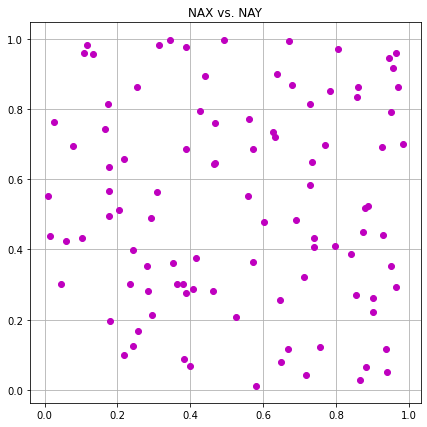

In [93]:
#Leemos los archivos de 100 números aleatorios. 
#Se usa Skiprows de -1 para dejar pasar un espacio y nombrar a las columnas "NAX" (Número Aleatorio en X) y 
#"NAY" (Número Aleatorio en Y).
#Se lee el archivo con 10,000 parejas de datos aleatorios.
file_path_NA100 = os.path.join(current_dir, 'Números Aleatorios', 'nale100.dat')
dfRand100 = pd.DataFrame(pd.read_csv(file_path_NA100, skiprows=-1, sep='\s+', header=None, names=["NAX", "NAY"]))

dfRand100.index = np.arange(1, 100)
#Graficamos las parejas de datos aleatorios.
plt.figure(figsize=(7, 7))
#Marcamos la trayectoria con puntos.
plt.plot(dfRand100["NAX"], dfRand100["NAY"], 'mo')
plt.grid(True)
#plt.legend()
plt.title("NAX vs. NAY")
plt.show()

--------------------------------------------------------------------------

Ahora se analizarán los casos donde haya un lado más favorecido.

**PROBABILIDAD PASO A LA DERECHA EN X de 0.55 y PASO HACIA ARRIBA EN Y de 0.55**

In [94]:
# Especificar el prefijo y sufijo del nombre de archivo
prefix_e = '1we'
suffix = '.dat'

# Crear una lista vacía para almacenar los DataFrames
dfen = []

# Crear un loop para leer cada archivo y agregarlo a la lista de DataFrames
for i in range(1, 101):
    # Crear el nombre del archivo utilizando el prefijo y sufijo
    filename_e = prefix_e + str(i).zfill(3) + suffix
    
    # Leer el archivo y agregarlo a la lista de DataFrames
    dfe = pd.read_csv(os.path.join(current_dir, 'Partículas con 55% y 55%', filename_e), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])
    dfen.append(dfe)

In [95]:
#Se toma el último dato de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfen[i].X.iloc[9999]
    y = dfen[i].Y.iloc[9999]
    datx.append(x)
    daty.append(y)
dfeLast = pd.DataFrame({"X" : datx, "Y" : daty})
dfeLast.index = np.arange(1, 101)
dfeLast

,X,Y
1,901.0,1037.0
2,901.0,1001.0
3,927.0,1061.0
4,1037.0,851.0
5,999.0,1067.0
...,...,...
96,957.0,1057.0
97,1005.0,1129.0
98,1003.0,839.0
99,1125.0,1081.0


In [96]:
#Descripción de datos.
dfeLast.describe()

,X,Y
count,100.000000,100.000000
mean,1003.960000,1002.240000
std,107.312243,91.431171
min,675.000000,765.000000
25%,940.000000,948.500000
50%,1001.000000,1014.000000
75%,1071.000000,1064.000000
max,1269.000000,1199.000000


<AxesSubplot:>

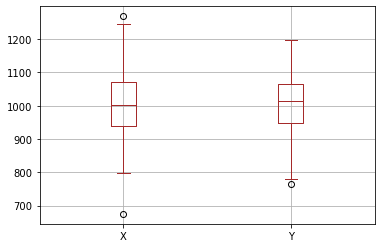

In [97]:
#Boxplot para los últimos datos.
dfeLast.plot.box(grid=True,color='brown')

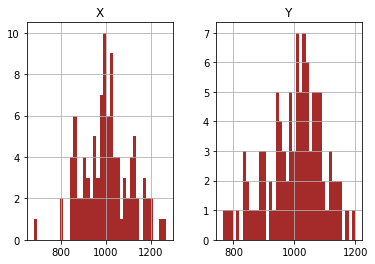

In [98]:
#Histograma con "bins" columnas.
hist = dfeLast.hist(bins=40, color='brown')

In [99]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfeLast
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.993, p=0.495
La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)


In [100]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasX, DesvX = ss.norm.fit(dfeLast["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)

#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfeLast["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)

Media ajustada a la normal = 1003.96
Desviación ajustada a la normal = 106.77433399464498
Media ajustada a la normal = 1002.24
Desviación ajustada a la normal = 90.97286628440374


In [101]:
#Se toma el dato 100 de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfen[i].X.iloc[100]
    y = dfen[i].Y.iloc[100]
    datx.append(x)
    daty.append(y)
dfeCien = pd.DataFrame({"X" : datx, "Y" : daty})
dfeCien.index = np.arange(1, 101)
dfeCien

,X,Y
1,18.0,16.0
2,20.0,24.0
3,8.0,8.0
4,10.0,18.0
5,12.0,10.0
...,...,...
96,18.0,-4.0
97,-8.0,26.0
98,-2.0,-6.0
99,12.0,0.0


In [102]:
#Descripción de datos.
dfeCien.describe()

,X,Y
count,100.000000,100.000000
mean,10.820000,9.900000
std,10.078861,10.111999
min,-8.000000,-16.000000
25%,4.000000,2.000000
50%,11.000000,10.000000
75%,16.000000,18.000000
max,38.000000,34.000000


<AxesSubplot:>

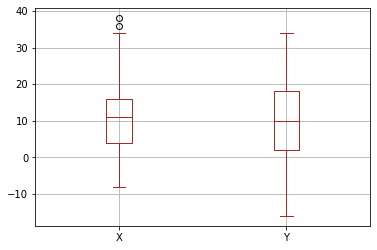

In [103]:
#Boxplot para los 100° datos.
dfeCien.plot.box(grid=True,color='brown')

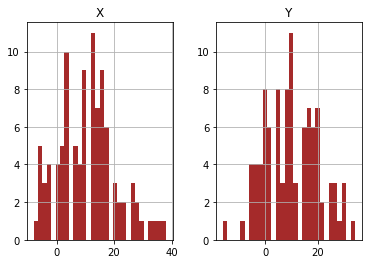

In [104]:
#Histograma con "bins" columnas.
hist = dfeCien.hist(bins=30, color='brown')

In [105]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfeCien
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.987, p=0.067
La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)


In [106]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasX, DesvX = ss.norm.fit(dfeCien["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)

#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfeCien["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)

Media ajustada a la normal = 10.82
Desviación ajustada a la normal = 10.028339842665883
Media ajustada a la normal = 9.9
Desviación ajustada a la normal = 10.061312041677269


----------------------------------------------------

Veamos ejemplos de puntos especificos

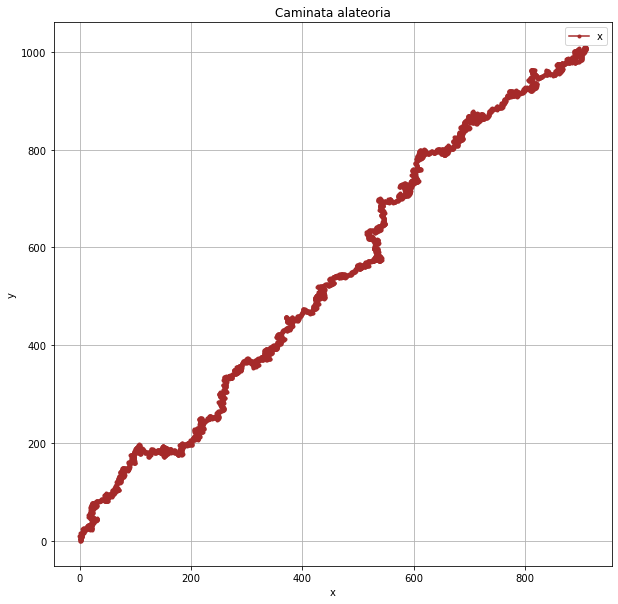

In [112]:
#Graficamos la trayectoria de la partícula 1we002
#Leyendo para ese archivo en especifico
dfe2 = pd.read_csv(os.path.join(current_dir, 'Partículas con 55% y 55%', '1we002.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfe2["X"], dfe2["Y"],label='x', marker="." , color='brown')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

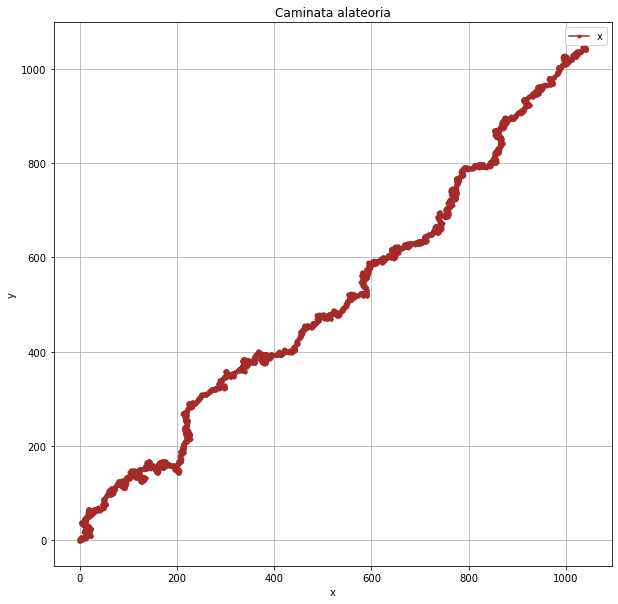

In [113]:
#Graficamos la trayectoria de la partícula 1we056
#Leyendo para ese archivo en especifico
dfe56 = pd.read_csv(os.path.join(current_dir, 'Partículas con 55% y 55%', '1we056.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfe56["X"], dfe56["Y"],label='x', marker="." , color='brown')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

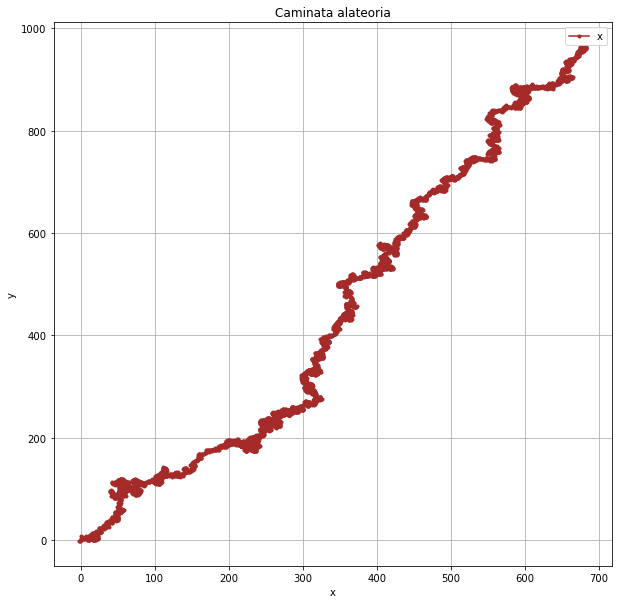

In [114]:
#Graficamos la trayectoria de la partícula 1we049
#Leyendo para ese archivo en especifico
dfe49 = pd.read_csv(os.path.join(current_dir, 'Partículas con 55% y 55%', '1we049.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfe49["X"], dfe49["Y"],label='x', marker="." , color='brown')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

------------------------------------------------------------------------------------

**PROBABILIDAD PASO A LA DERECHA EN X DE 0.60 y en Y DE 0.50**

In [115]:
# Especificar el prefijo y sufijo del nombre de archivo
prefix_d = '1wd'
suffix = '.dat'

# Crear una lista vacía para almacenar los DataFrames
dfdn = []

# Crear un loop para leer cada archivo y agregarlo a la lista de DataFrames
for i in range(1, 101):
    # Crear el nombre del archivo utilizando el prefijo y sufijo
    filename_d = prefix_d + str(i).zfill(3) + suffix
    
    # Leer el archivo y agregarlo a la lista de DataFrames
    dfd = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 50%', filename_d), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])
    dfdn.append(dfd)

In [116]:
#Se toma el último dato de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfdn[i].X.iloc[9999]
    y = dfdn[i].Y.iloc[9999]
    datx.append(x)
    daty.append(y)
dfdLast = pd.DataFrame({"X" : datx, "Y" : daty})
dfdLast.index = np.arange(1, 101)
dfdLast

,X,Y
1,2065.0,-107.0
2,2069.0,43.0
3,1953.0,35.0
4,2035.0,-125.0
5,2099.0,1.0
...,...,...
96,1933.0,83.0
97,2085.0,3.0
98,2009.0,27.0
99,2033.0,1.0


In [117]:
#Descripción de datos.
dfdLast.describe()

,X,Y
count,100.000000,100.000000
mean,1997.800000,17.280000
std,101.356058,95.142645
min,1747.000000,-151.000000
25%,1918.500000,-46.500000
50%,2009.000000,15.000000
75%,2065.000000,55.500000
max,2249.000000,377.000000


<AxesSubplot:>

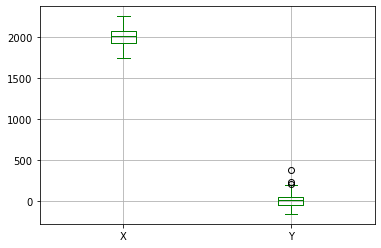

In [118]:
#Boxplot para los últimos datos.
dfdLast.plot.box(grid=True,color='green')

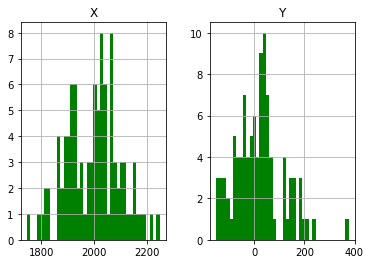

In [119]:
#Histograma con "bins" columnas.
hist = dfdLast.hist(bins=40, color='green')

In [120]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfdLast["X"]
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.992, p=0.804
La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)


In [121]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfdLast["Y"]
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.961, p=0.005
La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)


In [122]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasX, DesvX = ss.norm.fit(dfdLast["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)

#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfdLast["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)

Media ajustada a la normal = 1997.8
Desviación ajustada a la normal = 100.84800444232896
Media ajustada a la normal = 17.28
Desviación ajustada a la normal = 94.66573614566148


In [123]:
#Se toma eldato 100 de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfdn[i].X.iloc[100]
    y = dfdn[i].Y.iloc[100]
    datx.append(x)
    daty.append(y)
dfdCien = pd.DataFrame({"X" : datx, "Y" : daty})
dfdCien.index = np.arange(1, 101)
dfdCien

,X,Y
1,16.0,8.0
2,24.0,22.0
3,36.0,2.0
4,26.0,6.0
5,18.0,-2.0
...,...,...
96,14.0,-8.0
97,18.0,26.0
98,14.0,-24.0
99,28.0,-20.0


In [124]:
#Descripción de datos.
dfdCien.describe()

,X,Y
count,100.000000,100.000000
mean,19.820000,0.900000
std,9.535028,10.511658
min,-2.000000,-36.000000
25%,14.000000,-6.000000
50%,20.000000,0.000000
75%,26.000000,8.000000
max,42.000000,26.000000


<AxesSubplot:>

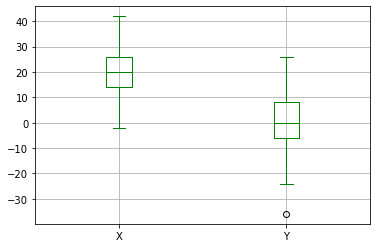

In [125]:
#Boxplot para los 100° datos.
dfdCien.plot.box(grid=True,color='green')

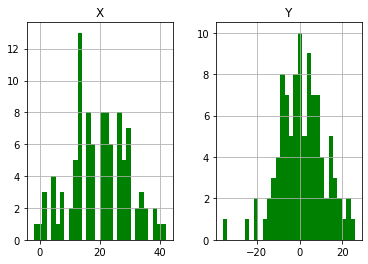

In [126]:
#Histograma con "bins" columnas.
hist = dfdCien.hist(bins=30, color='green')

In [127]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfdCien["X"]
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.988, p=0.517
La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)


In [128]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfdLast["Y"]
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.961, p=0.005
La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)


In [129]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasX, DesvX = ss.norm.fit(dfdCien["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)

#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfdCien["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)

Media ajustada a la normal = 19.82
Desviación ajustada a la normal = 9.487233527219619
Media ajustada a la normal = 0.9
Desviación ajustada a la normal = 10.458967444255672


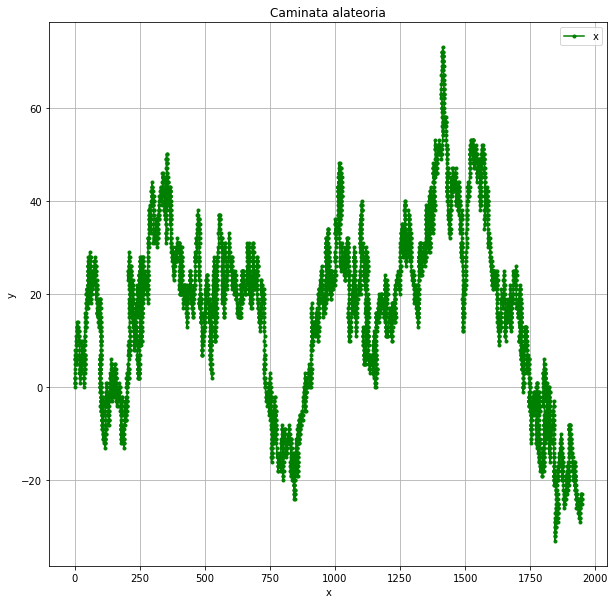

In [131]:
#Graficamos la trayectoria de la partícula 1wd050
#Leyendo para ese archivo en especifico
dfd50 = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 50%', '1wd050.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfd50["X"], dfd50["Y"],label='x', marker="." , color='green')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

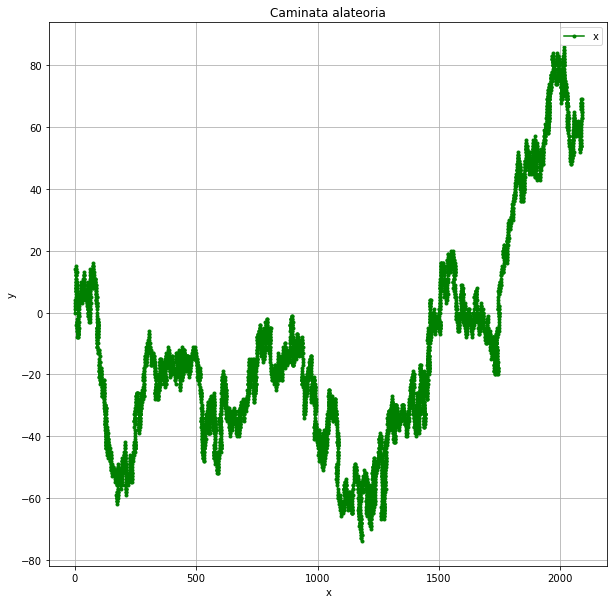

In [132]:
#Graficamos la trayectoria de la partícula 1wd100
#Leyendo para ese archivo en especifico
dfd100 = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 50%', '1wd100.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfd100["X"], dfd100["Y"],label='x', marker="." , color='green')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

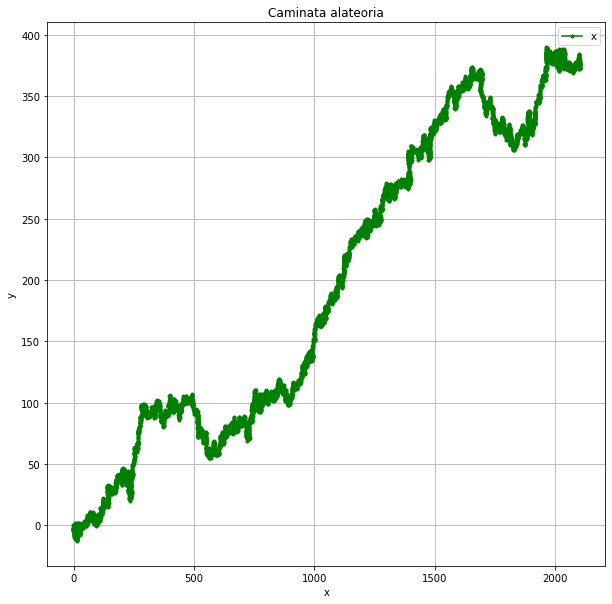

In [133]:
#Graficamos la trayectoria de la partícula 1wd100
#Leyendo para ese archivo en especifico
dfd88 = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 50%', '1wd088.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfd88["X"], dfd88["Y"],label='x', marker="." , color='green')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

--------------------------------------------------------------------

**PROBABILIDAD PASO A LA DERECHA EN X y Y DE 0.60**

In [134]:
# Especificar el prefijo y sufijo del nombre de archivo
prefix_c = '1wc'
suffix = '.dat'

# Crear una lista vacía para almacenar los DataFrames
dfcn = []

# Crear un loop para leer cada archivo y agregarlo a la lista de DataFrames
for i in range(1, 101):
    # Crear el nombre del archivo utilizando el prefijo y sufijo
    filename_c = prefix_c + str(i).zfill(3) + suffix
    
    # Leer el archivo y agregarlo a la lista de DataFrames
    dfc = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 60%', filename_c), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])
    dfcn.append(dfc)

In [135]:
#Se toma el último dato de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfcn[i].X.iloc[9999]
    y = dfcn[i].Y.iloc[9999]
    datx.append(x)
    daty.append(y)
dfcLast = pd.DataFrame({"X" : datx, "Y" : daty})
dfcLast.index = np.arange(1, 101)
dfcLast

,X,Y
1,1995.0,1855.0
2,1927.0,1927.0
3,1967.0,2031.0
4,1867.0,1869.0
5,1911.0,2093.0
...,...,...
96,2061.0,1933.0
97,2199.0,2263.0
98,2055.0,1925.0
99,1977.0,1971.0


In [136]:
#Descripción de datos.
dfcLast.describe()

,X,Y
count,100.000000,100.000000
mean,1989.080000,1988.420000
std,96.513743,108.241516
min,1769.000000,1641.000000
25%,1923.000000,1924.500000
50%,1990.000000,1989.000000
75%,2051.500000,2059.000000
max,2269.000000,2263.000000


<AxesSubplot:>

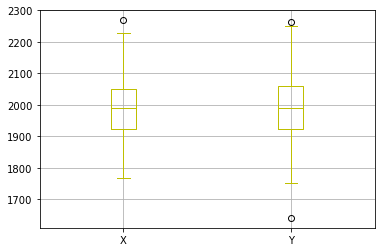

In [137]:
#Boxplot para los últimos datos.
dfcLast.plot.box(grid=True,color='y')

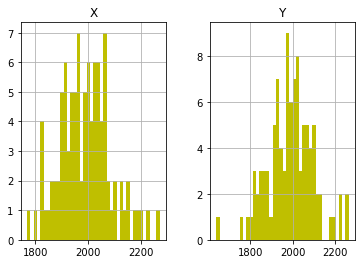

In [138]:
#Histograma con "bins" columnas.
hist = dfcLast.hist(bins=40, color='y')

In [139]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfcLast
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.992, p=0.347
La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)


In [140]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasX, DesvX = ss.norm.fit(dfcLast["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)

#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfcLast["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)

Media ajustada a la normal = 1989.08
Desviación ajustada a la normal = 96.02996199103693
Media ajustada a la normal = 1988.42
Desviación ajustada a la normal = 107.69894892709027


---------------------------------------------------------------

Se evalúa lo mismo con el paso número 100 de cada partícula.

In [141]:
#Se toma eldato 100 de cada DataFrame y se colocan en un nuevo DataFrame.
#Se emplea un for.

datx = []
daty = []
for i in range (0, 100):
    x = dfcn[i].X.iloc[100]
    y = dfcn[i].Y.iloc[100]
    datx.append(x)
    daty.append(y)
dfcCien = pd.DataFrame({"X" : datx, "Y" : daty})
dfcCien.index = np.arange(1, 101)
dfcCien

,X,Y
1,16.0,30.0
2,22.0,20.0
3,12.0,14.0
4,34.0,20.0
5,14.0,26.0
...,...,...
96,10.0,42.0
97,12.0,40.0
98,34.0,16.0
99,20.0,12.0


In [142]:
#Descripción de datos.
dfcCien.describe()

,X,Y
count,100.000000,100.000000
mean,21.280000,21.060000
std,10.392383,9.549256
min,2.000000,-10.000000
25%,13.500000,15.500000
50%,20.000000,22.000000
75%,28.000000,28.000000
max,46.000000,42.000000


<AxesSubplot:>

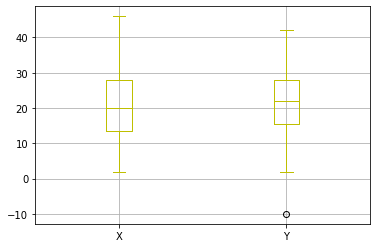

In [143]:
#Boxplot para los 100° datos.
dfcCien.plot.box(grid=True,color='y')

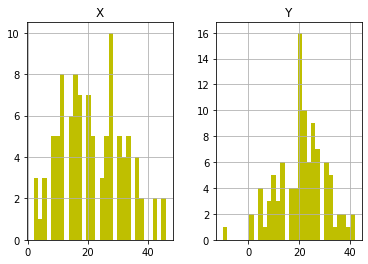

In [144]:
#Histograma con "bins" columnas.
hist = dfcCien.hist(bins=30, color='y')

In [145]:
#Prueba Shapiro-Wilk.
#Probar si los datos siguen una distribución Gaussiana.
#Se parte de desconocer el tipo de distribución de los datos.
#Se asume que las observaciones en cada muestra son independientes e idénticamente distribuídas.
#Hipótesis Nula y Alternativa:
#H0 = La muestra sigue una Distribución Gaussiana.
#H1 = La muestra no sigue una Distribución Gaussiana.

from scipy.stats import shapiro
data = dfcCien
stat, p = shapiro(data)
#Estadístico de Prueba y P-valor.
print('Estadístico de Prueba=%.3f, p=%.3f' % (stat, p))

#Interpretación
#Nivel de significancia:
alpha = 0.05
if p > alpha:
	print('La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)')
else:
	print('La muestra, al parecer, no sigue una Distribución Gaussiana (se rechaza H0)')

Estadístico de Prueba=0.992, p=0.348
La muestra parece seguir una Distribución Gaussiana (no se rechaza H0)


In [146]:
#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasX, DesvX = ss.norm.fit(dfcCien["X"])
print("Media ajustada a la normal =", MediasX)
print("Desviación ajustada a la normal =", DesvX)

#Se hace un ajuste para aproximar a una Normal para las "Y".
MediasY, DesvY = ss.norm.fit(dfcCien["Y"])
print("Media ajustada a la normal =", MediasY)
print("Desviación ajustada a la normal =", DesvY)

Media ajustada a la normal = 21.28
Desviación ajustada a la normal = 10.340290131326102
Media ajustada a la normal = 21.06
Desviación ajustada a la normal = 9.501389372086589


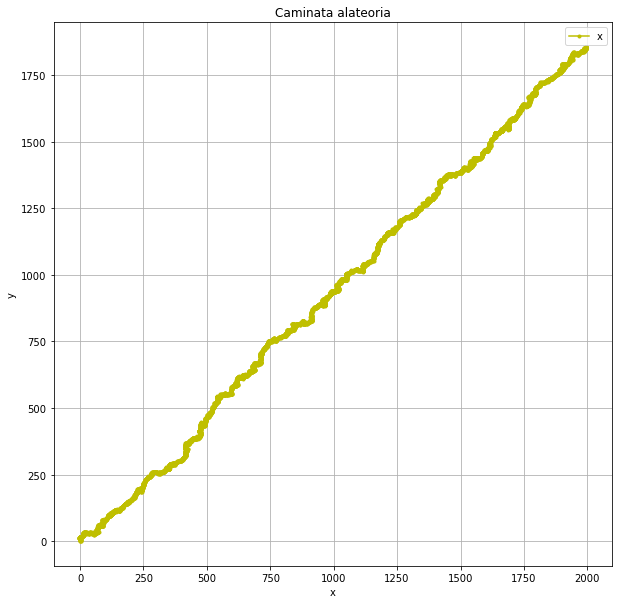

In [148]:
#Graficamos la trayectoria de la partícula 1wc100
#Leyendo para ese archivo en especifico
dfc1 = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 60%', '1wc001.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfc1["X"], dfc1["Y"],label='x', marker="." , color='y')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

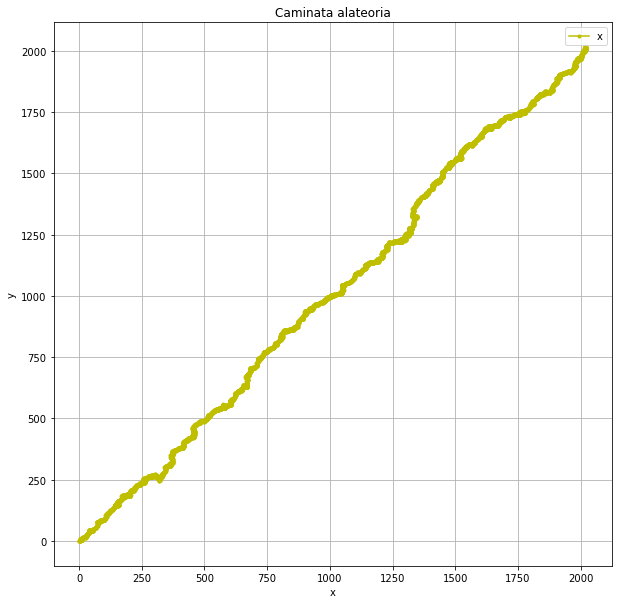

In [149]:
#Graficamos la trayectoria de la partícula 1wc027
#Leyendo para ese archivo en especifico
dfc27 = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 60%', '1wc027.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfc27["X"], dfc27["Y"],label='x', marker="." , color='y')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

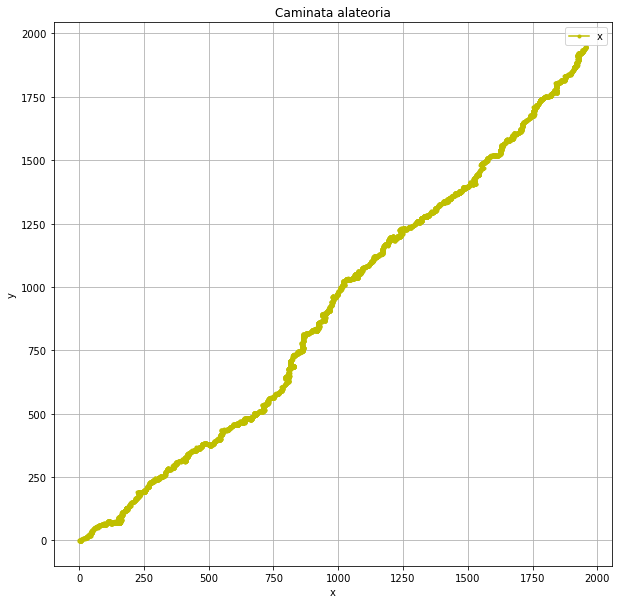

In [150]:
#Graficamos la trayectoria de la partícula 1wc015
#Leyendo para ese archivo en especifico
dfc15 = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 60%', '1wc015.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfc15["X"], dfc15["Y"],label='x', marker="." , color='y')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()

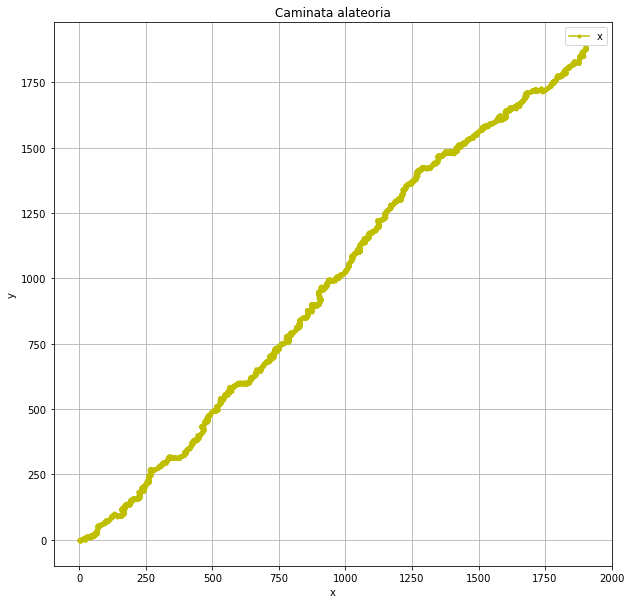

In [151]:
#Graficamos la trayectoria de la partícula 1wc094
#Leyendo para ese archivo en especifico
dfc94 = pd.read_csv(os.path.join(current_dir, 'Partículas con 60% y 60%', '1wc094.dat'), skiprows=-1, sep='\s+', header=None, names=["X", "Y"])

#Para graficar
plt.figure(figsize=(10, 10))
#Marcamos la trayectoria con puntos.
plt.plot(dfc94["X"], dfc94["Y"],label='x', marker="." , color='y')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Caminata alateoria")
plt.show()